## Customer Churn

- Customer churn is defined as the percentage of customers who leave the service or product within a predefined time frame.

ex: 
1. For a Telecom Industry, Churn would refer to the customer leaving the telephone service of the company
2. For Financial Sector, Churn would refer to a customer leaving the financial services like existing a service from a one bank and becoming a customer of another bank
3. For OTT domain, Churn would refer to customer leaving Netflix and enjoying the services by Amazon prime etc.

## Telco - customer Churn

- Problem Statement : Inspect the satisfaction level of the customer and predict whether the customer is enjoying our services or will the customer be a churned customer?

- When we look at the data we understand that the customers are not only enjoying Phone Services but also enjoying the Other Services like Internet Service, Online Security, Online Backup, etc

## Load the standard libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.shape

(7043, 21)

## Understand the count of Customers Churned

<Axes: xlabel='Churn', ylabel='count'>

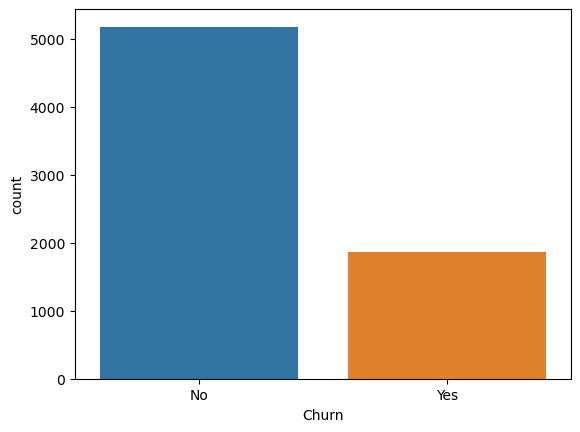

In [8]:
sns.countplot(x = data['Churn'])

In [10]:
data['Churn'].value_counts(normalize = True) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## Observations:
- 73.5% of the people do not churn and continue enjoying the servies
- 26.5% of the people churn and quit enjoying the services
- Conclusion - Data is imbalanced because when we observe the Churn column we find that approx 75% of people are enjoying the services and only 25% quit the servies. In the entire data, 75% of the data belongs to No and 25% of the data belongs to Yes

In [11]:
## 75% of 7043

0.75 * 7043

5282.25

In [12]:
## 25% of 7043 

0.25 * 7043

1760.75

## We observe that out of 7043 people 5283 people do not quit the services and 25% of the people quit the services

### Note:

- Assume when you are applying ML algorithm, before model building we perform train test split. Suppose we perform 75% train data and 25% test data(75-25 split). For an instance there is a possibility that all the 5283 people become a part of train set and 1760 people become a part of test set. This is rise to a problem

In [16]:
df = pd.DataFrame({
            'Age' : [20, 25, 30, 32, 34, 45, 57, 62, 51, 49],
            'Purchased' : ['N' ,'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
}
)
df

,Age,Purchased
0,20,N
1,25,Y
2,30,N
3,32,Y
4,34,Y
5,45,Y
6,57,Y
7,62,Y
8,51,Y
9,49,Y


## 
- In the above df, we observe that 8 Yes classes and 2 No classes. The observation is one class is extremely higher compared to the other class.
- Applying train test split with 80 - 20 split, there is a possibility that the higher class becomes a part of train set and the lesser class completely becomes the part of test.
- When these 2 condition can be seen in a dataset then we call that as Class Imbalance problem

## Question is : How to deal with Data imbalance problem?

- There are techniques like : UnderSampling, OverSampling, Stratified Sampling and SMOTE that can be used to deal with Class Imbalance problem

## Find out customer with which kind of services have the highest probability of quitting

<Axes: xlabel='Churn', ylabel='count'>

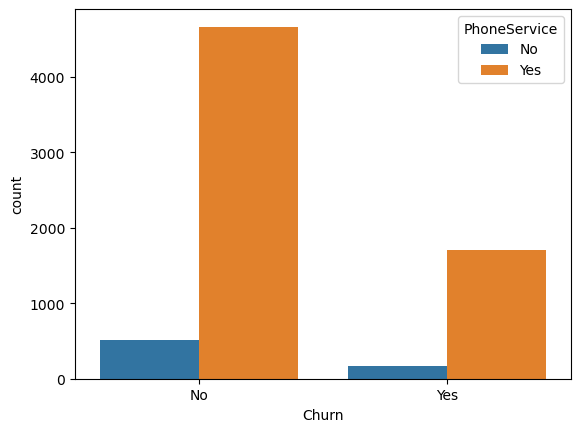

In [18]:
sns.countplot(x = data['Churn'], hue = data['PhoneService'])

<Axes: xlabel='Churn', ylabel='count'>

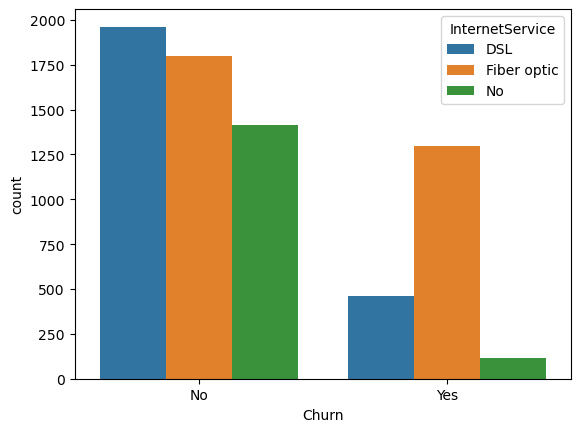

In [19]:
sns.countplot(x = data['Churn'], hue = data['InternetService'])

## Observations:

- Customers with Phone Service have a higher Churn rate.
- In Internet Service, Customers using Fibre Optic service have the highest Churn rate.
- Customers Not using any Internet Services are also quitting the Services

<Axes: xlabel='Churn', ylabel='count'>

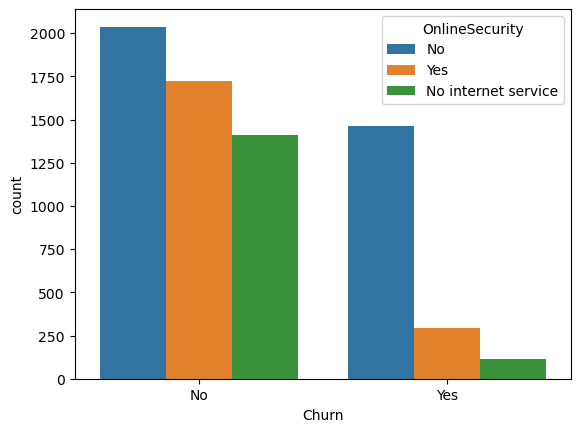

In [20]:
sns.countplot(x = data['Churn'], hue = data['OnlineSecurity'])

<Axes: xlabel='Churn', ylabel='count'>

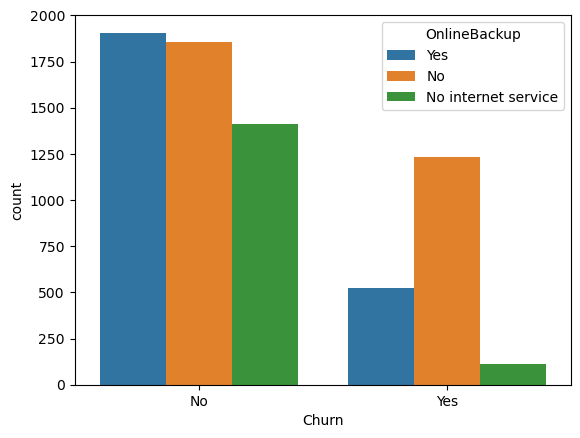

In [21]:
sns.countplot(x = data['Churn'], hue = data['OnlineBackup'])

<Axes: xlabel='Churn', ylabel='count'>

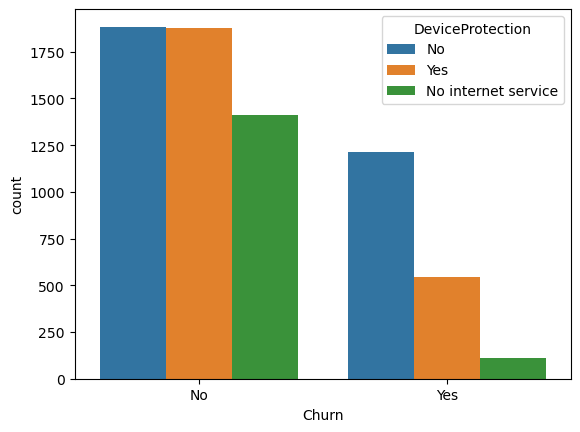

In [22]:
sns.countplot(x = data['Churn'], hue = data['DeviceProtection'])

<Axes: xlabel='Churn', ylabel='count'>

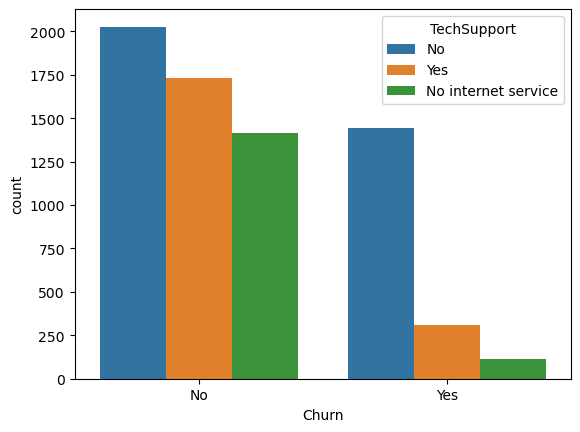

In [23]:
sns.countplot(x = data['Churn'], hue = data['TechSupport'])

<Axes: xlabel='Churn', ylabel='count'>

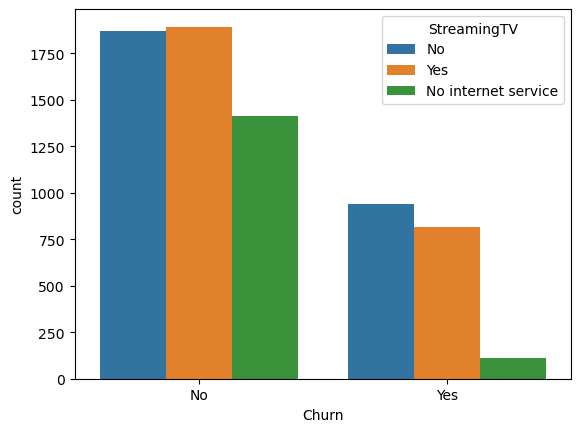

In [24]:
sns.countplot(x = data['Churn'], hue = data['StreamingTV'])

<Axes: xlabel='Churn', ylabel='count'>

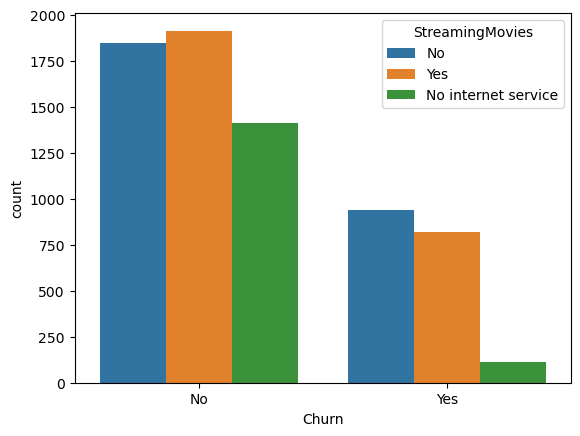

In [25]:
sns.countplot(x = data['Churn'], hue = data['StreamingMovies'])

In [27]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<Axes: xlabel='Churn', ylabel='count'>

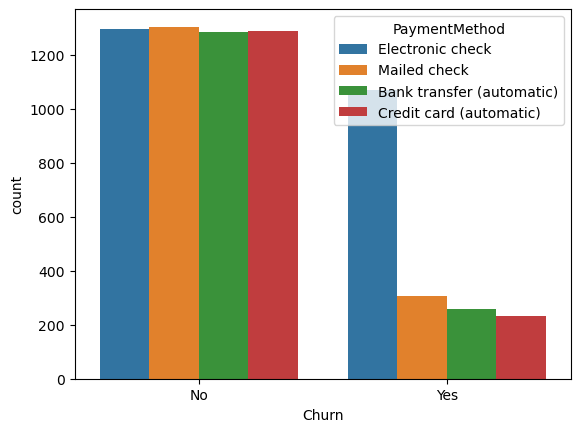

In [28]:
sns.countplot(x = data['Churn'], hue = data['PaymentMethod'])

## Observations:

- Electronic Check payment method customer have the highest churn rate compared to other payemnt methods